# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import covsirphy as cs
cs.__version__

'2.5.2'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [3]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

### The number of cases (JHU style)

In [4]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [5]:
print(data_loader.covid19dh_citation)

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (2019), https://ec.europa.eu/
Geloky (2019), https://geloky.com/
Istituto Nazionale di Statistica, Italia (2018), htt

In [6]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
144983,2020-07-11,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
144984,2020-07-12,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
144985,2020-07-13,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
144986,2020-07-14,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
144987,2020-07-15,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [7]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
144983,2020-07-11,Colombia,Vichada,1,0,0,1
144984,2020-07-12,Colombia,Vichada,1,0,0,1
144985,2020-07-13,Colombia,Vichada,1,0,0,1
144986,2020-07-14,Colombia,Vichada,1,0,0,1
144987,2020-07-15,Colombia,Vichada,1,0,0,1


In [8]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
178,2020-07-11,7721,1302,325,6094
179,2020-07-12,7927,1433,325,6169
180,2020-07-13,8046,1498,325,6223
181,2020-07-14,8189,1528,325,6336
182,2020-07-15,8354,1556,326,6472


In [9]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-07-11,19101148,9286823,827558,8986767,0.043325,0.470483,0.084321
2020-07-12,19409079,9448174,832500,9128405,0.042892,0.470316,0.083577
2020-07-13,19681000,9529328,837338,9314334,0.042546,0.473265,0.082483
2020-07-14,20036329,9693934,844227,9498168,0.042135,0.474047,0.081628
2020-07-15,20037629,9694614,844229,9498786,0.042132,0.474047,0.081623


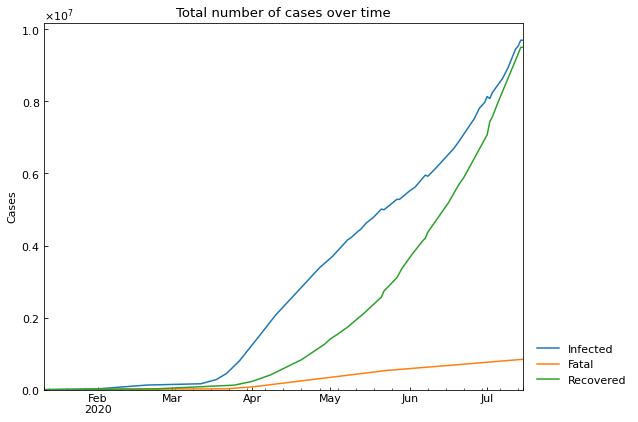

In [10]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [11]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
182,2020-07-11,21529,2707,982,17840
183,2020-07-12,21937,2955,982,18000
184,2020-07-13,22198,3115,983,18100
185,2020-07-14,22531,3272,983,18276
186,2020-07-15,22983,3461,984,18538


In [12]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [13]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
150,2020-07-10,20719,2085,982,17652
151,2020-07-11,21129,2298,982,17849
152,2020-07-12,21502,2517,982,18003
153,2020-07-13,21868,2783,982,18103
154,2020-07-14,22220,2956,982,18282


### Population in each country

In [14]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [15]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
144983,2020-07-11,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
144984,2020-07-12,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
144985,2020-07-13,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
144986,2020-07-14,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
144987,2020-07-15,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [16]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Population
783,CZE,Czech Republic,Plzenský kraj,584672
784,COL,Colombia,Bolívar,2070110
785,RUS,Russia,Murmansk oblast,795409
786,RUS,Russia,Republic of Crimea,1913731
787,COL,Colombia,Vichada,107808


In [17]:
population_data.value("Japan", province=None)

126529100

In [18]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [19]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [20]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
144983,2020-07-11,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
144984,2020-07-12,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
144985,2020-07-13,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
144986,2020-07-14,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
144987,2020-07-15,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [21]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
144983,2020-07-11,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
144984,2020-07-12,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
144985,2020-07-13,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
144986,2020-07-14,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
144987,2020-07-15,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Subset for a country
oxcgrt_data.subset(country="Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
182,2020-07-11,2,0,1,0,0,0,0,3,2,2,1,27.78
183,2020-07-12,2,0,1,0,0,0,0,3,2,2,1,27.78
184,2020-07-13,2,0,1,0,0,0,0,3,2,2,1,27.78
185,2020-07-14,2,0,1,0,0,0,0,3,2,2,1,27.78
186,2020-07-15,2,0,1,0,0,0,0,3,2,2,1,27.78


In [23]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset(iso3="JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
182,2020-07-11,2,0,1,0,0,0,0,3,2,2,1,27.78
183,2020-07-12,2,0,1,0,0,0,0,3,2,2,1,27.78
184,2020-07-13,2,0,1,0,0,0,0,3,2,2,1,27.78
185,2020-07-14,2,0,1,0,0,0,0,3,2,2,1,27.78
186,2020-07-15,2,0,1,0,0,0,0,3,2,2,1,27.78


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [24]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

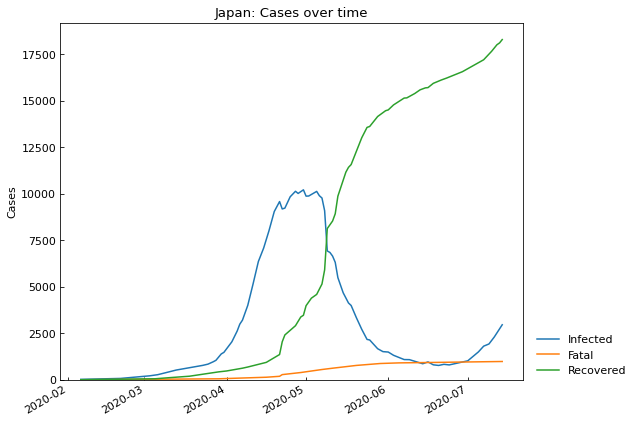

,Date,Confirmed,Infected,Fatal,Recovered
150,2020-07-10,20719,2085,982,17652
151,2020-07-11,21129,2298,982,17849
152,2020-07-12,21502,2517,982,18003
153,2020-07-13,21868,2783,982,18103
154,2020-07-14,22220,2956,982,18282


In [25]:
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

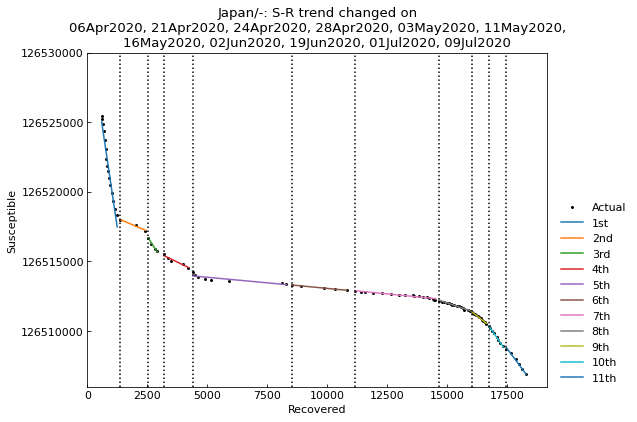

,Type,Start,End,Population
1st,Past,06Apr2020,20Apr2020,126529100
2nd,Past,21Apr2020,23Apr2020,126529100
3rd,Past,24Apr2020,27Apr2020,126529100
4th,Past,28Apr2020,02May2020,126529100
5th,Past,03May2020,10May2020,126529100
6th,Past,11May2020,15May2020,126529100
7th,Past,16May2020,01Jun2020,126529100
8th,Past,02Jun2020,18Jun2020,126529100
9th,Past,19Jun2020,30Jun2020,126529100
10th,Past,01Jul2020,08Jul2020,126529100


In [26]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [27]:
scenario.estimate(cs.SIRF)


<Main scenario: perform parameter estimation>

Running optimization with 8 CPUs...

	11th phase with SIR-F model finished 187 trials in 0 min 20 sec.

	3rd phase with SIR-F model finished 126 trials in 0 min 20 sec.

	1st phase with SIR-F model finished 397 trials in 1 min 1 sec.

	2nd phase with SIR-F model finished 370 trials in 1 min 1 sec.

	4th phase with SIR-F model finished 335 trials in 1 min 1 sec.

	9th phase with SIR-F model finished 49 trials in 0 min 10 sec.

	10th phase with SIR-F model finished 80 trials in 0 min 15 sec.

	5th phase with SIR-F model finished 325 trials in 1 min 1 sec.

	8th phase with SIR-F model finished 183 trials in 0 min 30 sec.

	6th phase with SIR-F model finished 352 trials in 1 min 1 sec.

	7th phase with SIR-F model finished 425 trials in 1 min 1 sec.

Completed optimization. Total: 2 min 47 sec

In [28]:
scenario.summary()

,Type,Start,End,Population,ODE,rho,sigma,theta,kappa,tau,Rt,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,06Apr2020,20Apr2020,126529100,SIR-F,0.005721,0.000534,0.000458,0.000098,120,9.05,0.000,849,14,156,0.237028,397,1 min 1 sec
2nd,Past,21Apr2020,23Apr2020,126529100,SIR-F,0.003688,0.004884,0.415017,0.000048,120,0.44,0.415,1734,22,17,0.148904,370,1 min 1 sec
3rd,Past,24Apr2020,27Apr2020,126529100,SIR-F,0.003033,0.001052,0.058713,0.000054,120,2.58,0.059,1533,27,79,0.031901,126,0 min 20 sec
4th,Past,28Apr2020,02May2020,126529100,SIR-F,0.002126,0.002149,0.193801,0.000048,120,0.78,0.194,1729,39,38,0.086600,335,1 min 1 sec
5th,Past,03May2020,10May2020,126529100,SIR-F,0.001061,0.002641,0.281034,0.000048,120,0.28,0.281,1734,78,31,0.146165,325,1 min 1 sec
6th,Past,11May2020,15May2020,126529100,SIR-F,0.001035,0.007932,0.796847,0.000067,120,0.03,0.797,1238,80,10,0.062825,352,1 min 1 sec
7th,Past,16May2020,01Jun2020,126529100,SIR-F,0.001230,0.006654,0.488474,0.000087,120,0.09,0.488,958,67,12,0.127213,425,1 min 1 sec
8th,Past,02Jun2020,18Jun2020,126529100,SIR-F,0.003754,0.005567,0.278229,0.000014,120,0.49,0.278,5876,22,14,0.109234,183,0 min 30 sec
9th,Past,19Jun2020,30Jun2020,126529100,SIR-F,0.008717,0.006013,0.027397,0.001819,120,1.08,0.027,45,9,13,0.091897,49,0 min 10 sec
10th,Past,01Jul2020,08Jul2020,126529100,SIR-F,0.013037,0.005468,0.067006,0.000690,120,1.98,0.067,120,6,15,0.078774,80,0 min 15 sec


### Accuracy of estimation

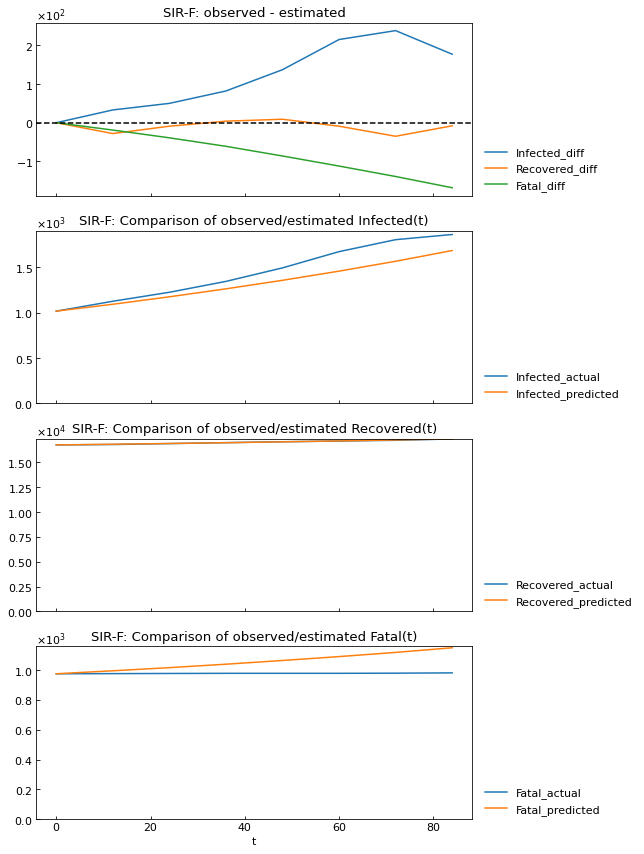

In [29]:
scenario.estimate_accuracy(phase="10th")

### Get parameter value

In [30]:
scenario.get("Rt", phase="4th")

0.78

### Show parameter history

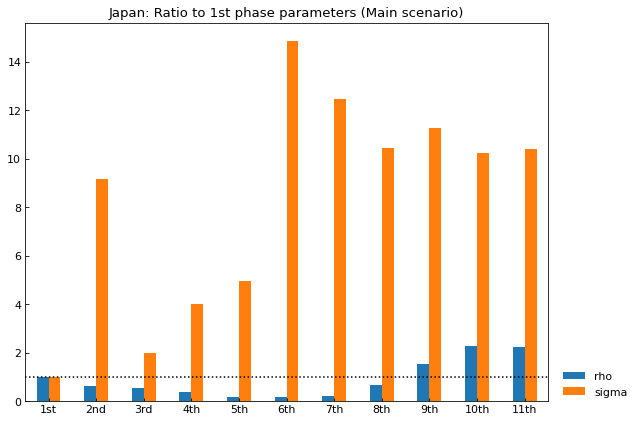

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th
rho,1.0,0.644585,0.530222,0.371673,0.185543,0.180988,0.214998,0.656267,1.523687,2.278948,2.242418
sigma,1.0,9.153735,1.971288,4.027409,4.949289,14.866622,12.470277,10.434827,11.269619,10.248551,10.402312


In [31]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

### Show the history of reproduction number

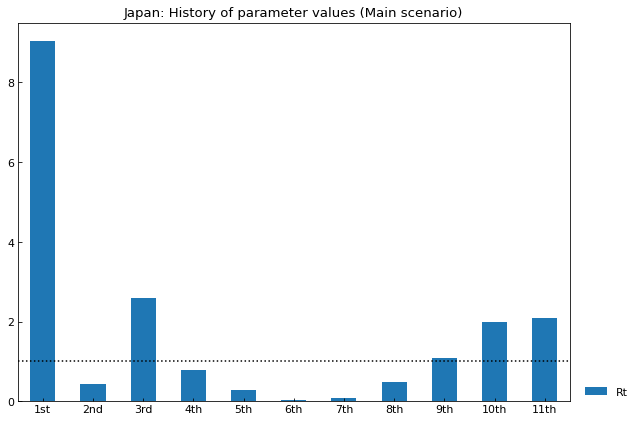

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th
Rt,9.05,0.44,2.58,0.78,0.28,0.03,0.09,0.49,1.08,1.98,2.1


In [32]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

### Simulate the number of cases

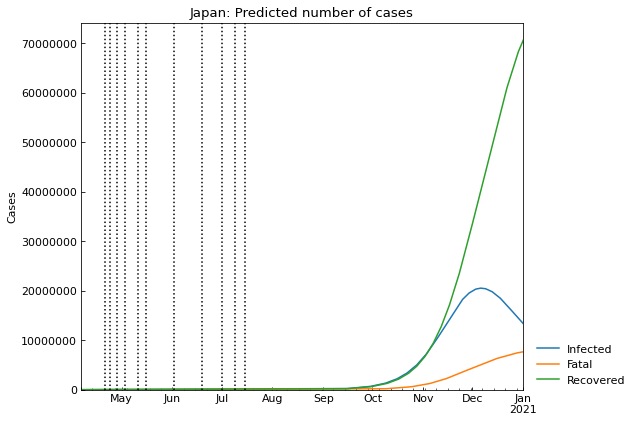

,Date,Susceptible,Infected,Recovered,Fatal
266,28Dec2020,37089841,14735221,67292752,7411287
267,29Dec2020,36448119,14335537,68261235,7484210
268,30Dec2020,35833219,13938142,69203092,7554648
269,31Dec2020,35243016,13544890,70118477,7622719
270,01Jan2021,34931963,13333976,70604426,7658737


In [33]:
scenario.clear(name="Main")
scenario.add_phase(name="Main", end_date="01Jan2021")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [34]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.0055501448910986574

In [35]:
sigma_new = sigma_current * 2
sigma_new

0.011100289782197315

In [36]:
scenario.clear(name="Medicine")
scenario.add_phase(name="Medicine", days=30, sigma=sigma_current)
scenario.add_phase(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE       rho  \
Scenario Phase                                                              
Main     1st      Past  06Apr2020  20Apr2020   126529100  SIR-F  0.005721   
         2nd      Past  21Apr2020  23Apr2020   126529100  SIR-F  0.003688   
         3rd      Past  24Apr2020  27Apr2020   126529100  SIR-F  0.003033   
         4th      Past  28Apr2020  02May2020   126529100  SIR-F  0.002126   
         5th      Past  03May2020  10May2020   126529100  SIR-F  0.001061   
         6th      Past  11May2020  15May2020   126529100  SIR-F  0.001035   
         7th      Past  16May2020  01Jun2020   126529100  SIR-F  0.001230   
         8th      Past  02Jun2020  18Jun2020   126529100  SIR-F  0.003754   
         9th      Past  19Jun2020  30Jun2020   126529100  SIR-F  0.008717   
         10th     Past  01Jul2020  08Jul2020   126529100  SIR-F  0.013037   
         11th     Past  09Jul2020  14Jul2020   126529100  SIR-F  0.012828   
         12th   Future  15Jul2020  01Jan2021   126529100  SIR-F  0.012828   
Medicine 1st      Past  06Apr2020  20Apr2020   126529100  SIR-F  0.005721   
         2nd      Past  21Apr2020  23Apr2020   126529100  SIR-F  0.003688   
         3rd      Past  24Apr2020  27Apr2020   126529100  SIR-F  0.003033   
         4th      Past  28Apr2020  02May2020   126529100  SIR-F  0.002126   
         5th      Past  03May2020  10May2020   126529100  SIR-F  0.001061   
         6th      Past  11May2020  15May2020   126529100  SIR-F  0.001035   
         7th      Past  16May2020  01Jun2020   126529100  SIR-F  0.001230   
         8th      Past  02Jun2020  18Jun2020   126529100  SIR-F  0.003754   
         9th      Past  19Jun2020  30Jun2020   126529100  SIR-F  0.008717   
         10th     Past  01Jul2020  08Jul2020   126529100  SIR-F  0.013037   
         11th     Past  09Jul2020  14Jul2020   126529100  SIR-F  0.012828   
         12th   Future  15Jul2020  14Aug2020   126529100  SIR-F  0.012828   
         13th   Future  15Aug2020  01Jan2021   126529100  SIR-F  0.012828   

                   sigma     theta     kappa  tau    Rt  alpha1 [-]  \
Scenario Phase                                                        
Main     1st    0.000534  0.000458  0.000098  120  9.05       0.000   
         2nd    0.004884  0.415017  0.000048  120  0.44       0.415   
         3rd    0.001052  0.058713  0.000054  120  2.58       0.059   
         4th    0.002149  0.193801  0.000048  120  0.78       0.194   
         5th    0.002641  0.281034  0.000048  120  0.28       0.281   
         6th    0.007932  0.796847  0.000067  120  0.03       0.797   
         7th    0.006654  0.488474  0.000087  120  0.09       0.488   
         8th    0.005567  0.278229  0.000014  120  0.49       0.278   
         9th    0.006013  0.027397  0.001819  120  1.08       0.027   
         10th   0.005468  0.067006  0.000690  120  1.98       0.067   
         11th   0.005550  0.052254  0.000226  120  2.10       0.052   
         12th   0.005550  0.052254  0.000226  120  2.10       0.052   
Medicine 1st    0.000534  0.000458  0.000098  120  9.05       0.000   
         2nd    0.004884  0.415017  0.000048  120  0.44       0.415   
         3rd    0.001052  0.058713  0.000054  120  2.58       0.059   
         4th    0.002149  0.193801  0.000048  120  0.78       0.194   
         5th    0.002641  0.281034  0.000048  120  0.28       0.281   
         6th    0.007932  0.796847  0.000067  120  0.03       0.797   
         7th    0.006654  0.488474  0.000087  120  0.09       0.488   
         8th    0.005567  0.278229  0.000014  120  0.49       0.278   
         9th    0.006013  0.027397  0.001819  120  1.08       0.027   
         10th   0.005468  0.067006  0.000690  120  1.98       0.067   
         11th   0.005550  0.052254  0.000226  120  2.10       0.052   
         12th   0.005550  0.052254  0.000226  120  2.10       0.052   
         13th   0.011100  0.052254  0.000226  120  1.07       0.052   

                1/al

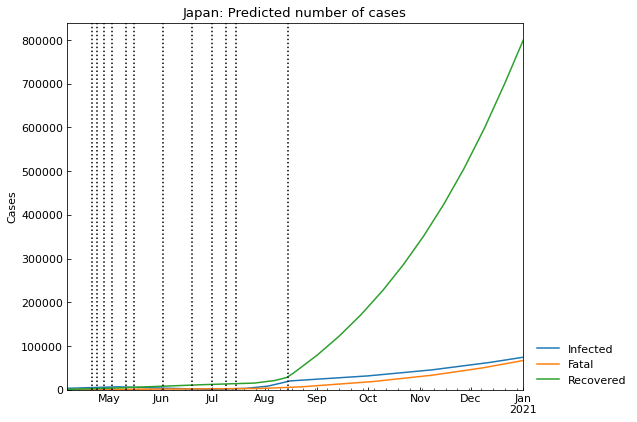

,Date,Susceptible,Infected,Recovered,Fatal
266,28Dec2020,125627678,71961,765422,64040
267,29Dec2020,125616630,72608,775051,64813
268,30Dec2020,125605484,73258,784766,65593
269,31Dec2020,125594239,73914,794568,66380
270,01Jan2021,125588112,74272,799911,66809


In [37]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [38]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 01Jan2021,Fatal on 01Jan2021
Main,20510220,06Dec2020,13333976,7658737
Medicine,74272,01Jan2021,74272,66809
